In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/local/WIN/msang2/mankun/Notebooks/[01]dimerEnhanceProteinDNA/')

In [2]:
# modules for direct calculation
import analytics as ana
# parameter generators
from GenerateParameters import GenParameters

In [3]:
def plotHeader(
    scale=1.0, fixSize=True, sizeX=5, sizeY=5,
    lgdLoc=[0.55,0.00], lgdFontSize=22, lgdHandleL=0.3, 
    lgdTitle='', lgdTtlFontSize=22,
    labelFontSize=20, tickFontSize=27, 
    tickL=15, tickW=2, spineLineW=2
):
    labelfont = {'fontsize':labelFontSize*scale}
    tickfont = {'fontsize':tickFontSize*scale}
    legend = {'fontsize':lgdFontSize*scale, 'loc':lgdLoc, 'handlelength':lgdHandleL*scale, 
              'title':lgdTitle, 'title_fontsize':lgdTtlFontSize*scale,
             'framealpha':0.0}
    if fixSize:
        fig = plt.figure(figsize=(sizeX*scale,sizeY*scale))
        ax = fig.add_subplot(111)
    else:
        ax = plt.gca()
    plt.tick_params(length=tickL*scale, width=tickW*scale)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(spineLineW*scale)  # change width
    colors = [
        'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
        'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
    ]
    linsStyles = ['-', '--']
    return ax, colors, linsStyles, legend, labelfont, tickfont, 0.6022 # C0, nm^-3 -> M

Here we need a special set up. The VtoL ratio shuold be kept the same (1000). The concentration of S and N should be kept the same. However, the protein concentration should not be too large while still maintaining dimerizations. Therefore, the system should be set much longer and the numbers of S and N are increased by the same scaler.

Besides, kbPP is set to fixed value.

## parameter choices

In [4]:
parm_Targ = GenParameters(
    hasTargets=True, NP0=[10], KPN=[2e1], 
    KPP=np.logspace(1,6,7+6*7), kbPP_fixed=10,
    area3Dto1D=[100], lengthScale=100,
)
parm_DNA = GenParameters(
    hasTargets=False, NP0=[10], KPN=[2e1], 
    KPP=np.logspace(1,6,7+6*7), kbPP_fixed=10,
    area3Dto1D=[100], lengthScale=100,
)

if parm_Targ.shape[0] == parm_DNA.shape[0]:
    dataSize = parm_Targ.shape[0]
    print('Size of parameter sets validated!', dataSize)
else:
    raise ValueError('Parameter sets have different sizes!')

Size of parameter sets validated! 49


In [5]:
pBound_clusTarg = np.zeros(dataSize)
pBound_targ = np.zeros(dataSize)
pBound_DNA = np.zeros(dataSize)
tau_clusTarg = np.zeros(dataSize)
tau_targ = np.zeros(dataSize)
tau_DNA = np.zeros(dataSize)
for iloc in range(dataSize):
    pBound_clusTarg[iloc] = ana.ana_bound_ratio(parm_Targ.iloc[iloc], 2)
    pBound_targ[iloc] = ana.ana_bound_ratio(parm_Targ.iloc[iloc], 1)
    pBound_DNA[iloc] = ana.ana_bound_ratio(parm_DNA.iloc[iloc], 0)
    tau_clusTarg[iloc] = ana.ana_resTime_balance(parm_Targ.iloc[iloc], 2)
    tau_targ[iloc] = ana.ana_resTime_balance(parm_Targ.iloc[iloc], 1)
    tau_DNA[iloc] = ana.ana_resTime_balance(parm_DNA.iloc[iloc], 0)

[]

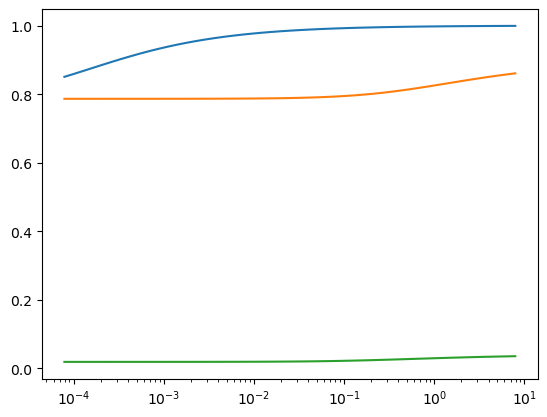

In [6]:
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), pBound_clusTarg)
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), pBound_targ)
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), pBound_DNA)

plt.semilogx()

[]

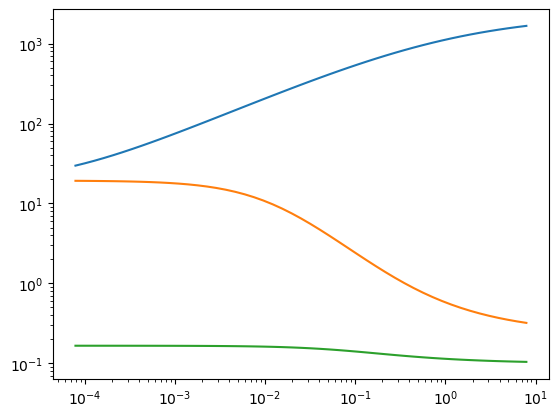

In [7]:
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), tau_clusTarg)
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), tau_targ)
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), tau_DNA)

plt.loglog()

In [34]:
parm_Targ = GenParameters(
    hasTargets=True, NP0=[10], KPN=[2e1], 
    KPP=np.logspace(2,7,7+6*7), kbPP_fixed=1,
    area3Dto1D=[100],
)
parm_DNA = GenParameters(
    hasTargets=False, NP0=[10], KPN=[2e1], 
    KPP=np.logspace(2,7,7+6*7), kbPP_fixed=1,
    area3Dto1D=[100],
)

if parm_Targ.shape[0] == parm_DNA.shape[0]:
    dataSize = parm_Targ.shape[0]
    print('Size of parameter sets validated!', dataSize)
else:
    raise ValueError('Parameter sets have different sizes!')

Size of parameter sets validated! 49


In [35]:
pBound_clusTarg = np.zeros(dataSize)
pBound_targ = np.zeros(dataSize)
pBound_DNA = np.zeros(dataSize)
tau_clusTarg = np.zeros(dataSize)
tau_targ = np.zeros(dataSize)
tau_DNA = np.zeros(dataSize)
for iloc in range(dataSize):
    pBound_clusTarg[iloc] = ana.ana_bound_ratio(parm_Targ.iloc[iloc], 2)
    pBound_targ[iloc] = ana.ana_bound_ratio(parm_Targ.iloc[iloc], 1)
    pBound_DNA[iloc] = ana.ana_bound_ratio(parm_DNA.iloc[iloc], 0)
    tau_clusTarg[iloc] = ana.ana_resTime_balance(parm_Targ.iloc[iloc], 2)
    tau_targ[iloc] = ana.ana_resTime_balance(parm_Targ.iloc[iloc], 1)
    tau_DNA[iloc] = ana.ana_resTime_balance(parm_DNA.iloc[iloc], 0)

[]

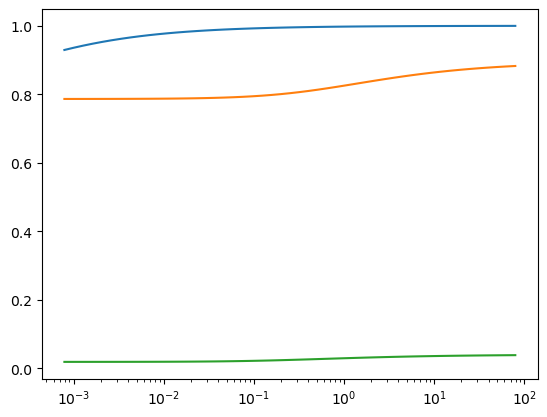

In [36]:
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), pBound_clusTarg)
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), pBound_targ)
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), pBound_DNA)

plt.semilogx()

[]

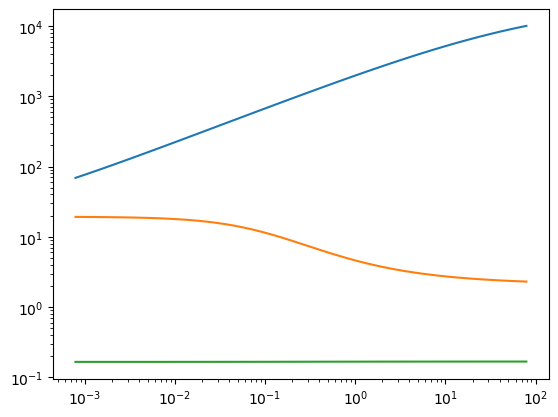

In [37]:
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), tau_clusTarg)
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), tau_targ)
plt.plot((parm_DNA['KPP']*parm_DNA['CP0']), tau_DNA)

plt.loglog()

## NERDSS residence time

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/local/WIN/msang2/mankun/Notebooks/[01]dimerEnhanceProteinDNA/')
from process_AD import readResT_from_NERDSS
# reaction networks and ode solver
from Simulations.odeSolver.Nonly import rxnNetwork, labels
from Simulations.odeSolver.main import main as numericSolver
# modules for direct calculation
import analytics as ana
# parameter generators
from GenerateParameters import GenParameters
from pathlib import Path
from scipy.optimize import curve_fit

In [5]:
def get_survival_prob(resident_times, bins=100):

    # get survival probabilities
    h = np.histogram(resident_times, bins=bins, density=True)
    return h[1], np.append([1], 1 - np.cumsum(h[0]*np.diff(h[1])))


In [6]:
def twoExp(x, f1, k1, k2):
    return np.log(f1*np.exp(-k1*x) + (1-f1)*np.exp(-k2*x))
def oneExp(x, k):
    return -k*x

def expFit(x, y, number):
    if number == 2:
        popt, pcov = curve_fit(
            twoExp, x, np.log(y), p0=(0,1,0.001), bounds=((0, 0, 0), (1, np.inf, np.inf)), 
            maxfev=1e5, ftol=1e-10, xtol=1e-6
        )
    elif number == 1:
        popt, pcov = curve_fit(
            oneExp, x, np.log(y), p0=(0.001,), bounds=((0,), (np.inf,)),
            maxfev=1e5, ftol=1e-10, xtol=1e-6
        )
    return popt

In [7]:
def readGillespieSurvP(filename):
    with open(filename) as f:
        reading = False
        times = []
        survP = []
        numDiss = 'Not Read'
        for line in f:
            if line.strip() == '# START SURVIVAL PROB':
                reading = True
            elif line.strip() == '# END SURVIVAL PROB':
                reading = False
            elif line.strip() == '# Mean Residence Time':
                meanResT = float(f.readline().strip())
            elif line.strip().startswith('Number of dissociation events:'):
                numDiss = int(line.split(':')[1])
            else:
                if reading:
                    linelist = line.split()
                    times.append(float(linelist[0]))
                    survP.append(float(linelist[1]))
    return np.array(times), np.array(survP), meanResT, numDiss

In [8]:
parms = GenParameters(
    ifwrite=False, hasTargets=False,
    NP0=[10], KPN=[100],
    KPP=[0,1e2,1e3,1e4], kbPP_fixed=0.01,
    area3Dto1D=[10], lengthScale=50,
)

resTs_ana = []
for i in range(parms.shape[0]):
    resTs_ana.append(ana.ana_resTime_balance(parms.iloc[i], numClusterS=0))
resTs_ana = np.array(resTs_ana)

In [9]:
# equis = numericSolver(parm_df=parms, labels=labels, model=rxnNetwork)
# pdir = '../Simulations/Gillespie/forNERDSS/'
# Path(pdir).mkdir(parents=True, exist_ok=True)
# parms.to_csv(pdir+'/parameters.csv')
# equis.to_csv(pdir+'/equilibrium.csv')

In [10]:
1.38e-23*np.log(2.5e80)

2.55469875476529e-21

In [11]:
from myutils import nerdssData

In [12]:
kppE4 = nerdssData.nerdssData(3, '../Simulations/NERDSS/ResTime//kppE4.0kpnE2.0')

>>>>>> parsing ../Simulations/NERDSS/ResTime//kppE4.0kpnE2.0
WaterBox = [1050.0, 31.623, 31.623] # VtoL=4000
{'P': 20, 'N': 600}
Reactions:
N(bs) + P(dbn) <-> N(bs!1).P(dbn!1)
P(dmr) + P(dmr) <-> P(dmr!1).P(dmr!1)
<<<<<< finished parsing
------------------------------------------------------


In [13]:
kppE4.readHist()

Found P: 1. at output 1 (time 0.0 s).
Found N: 1. at output 1 (time 0.0 s).
Found P: 2. N: 2. at output 2 (time 0.099999 s).
Finish read replication 1.
Found P: 1. at output 1 (time 0.0 s).
Found N: 1. at output 1 (time 0.0 s).
Found P: 2. N: 2. at output 2 (time 0.099999 s).
Finish read replication 2.
Found P: 1. at output 1 (time 0.0 s).
Found N: 1. at output 1 (time 0.0 s).
Found P: 2. N: 2. at output 2 (time 0.099999 s).
Finish read replication 3.


In [14]:
kppE4.MOLNAMES

['P: 1.', 'N: 1.', 'P: 2. N: 2.']

In [15]:
plt.errorbar(
    kppE4.time, 
#     kppE4.MOLS['P: 2. N: 1.']+kppE4.MOLS['P: 2. N: 2.'],
#     kppE4.MOLS_err['P: 2. N: 1.']+kppE4.MOLS_err['P: 2. N: 2.'],
    kppE4.MOLS['P: 1. N: 1.'],
    kppE4.MOLS_err['P: 1. N: 1.'],
)
plt.errorbar(
    kppE4.time, 
    kppE4.MOLS['P: 2. N: 1.']+kppE4.MOLS['P: 2. N: 2.']+kppE4.MOLS['P: 2.'],
    kppE4.MOLS_err['P: 2. N: 1.']+kppE4.MOLS_err['P: 2. N: 2.']+kppE4.MOLS_err['P: 2.'],
#     kppE4.MOLS['P: 1. N: 1.'],
#     kppE4.MOLS_err['P: 1. N: 1.'],
)

KeyError: 'P: 1. N: 1.'

In [78]:
for i in range(10):
    if True:
        continue
    if i%2==0:
        print(i)

Dissociation Events #: [581, 581, 600] Sim Time (s): [689.0, 680.0, 684.0]
Gillespie Events / 1s / 10 proteins: 1.05045
nerdss: 0.82, ana: 0.83, Gillespie: 0.83
nerdss: 0.82 +- 0.02


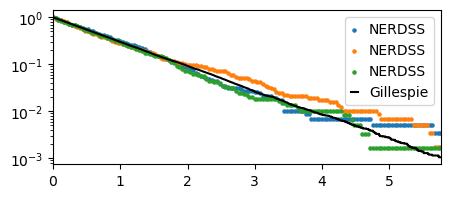

Dissociation Events #: [574, 542, 540] Sim Time (s): [681.0, 681.0, 678.0]
Gillespie Events / 1s / 10 proteins: 1.0431
nerdss: 0.83, ana: 0.85, Gillespie: 0.87
nerdss: 0.83 +- 0.04


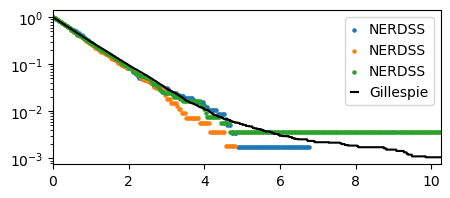

Dissociation Events #: [558, 538, 540] Sim Time (s): [682.0, 682.0, 682.0]
Gillespie Events / 1s / 10 proteins: 1.05335
nerdss: 1.12, ana: 1.04, Gillespie: 1.02
nerdss: 1.12 +- 0.14


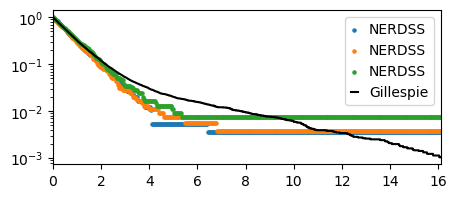

Dissociation Events #: [731, 471, 730] Sim Time (s): [690.0, 694.0, 684.0]
Gillespie Events / 1s / 10 proteins: 1.0524
nerdss: 2.67, ana: 1.98, Gillespie: 1.93
nerdss: 2.85 +- 1.05


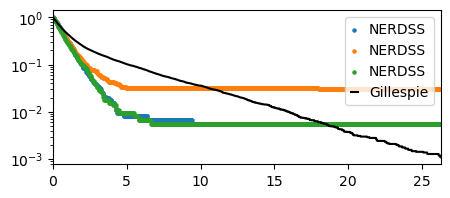

In [7]:
dt = 1e-6
numGillespie = [0,1,2,3]
binwidth = 0.04
timeUpperLimit = 1000
folders = 'ResTime/kpp0kpnE2.0  ResTime/kppE2.0kpnE2.0  ResTime/kppE3.0kpnE2.0  ResTime/kppE4.0kpnE2.0'.split()
# folders = ['ResTime/kppE7.0kpnE2.0']
meanResTs_NERDSS = []
for j, pfolder in enumerate(folders):
    gllspFile = f'../Simulations/Gillespie/forNERDSS_nonEqui/OUTPUTS_Nonly/out_{j}_r0'
    timeGllsp, survPGllsp, meanRestGllsp, numEvents = readGillespieSurvP(gllspFile)
    resTime_nerdss = []
    resTime_means = []
    lastTime = []
    for i in range(3):
        datafile = f'../Simulations/NERDSS/{pfolder}/{i}/assoc_dissoc_time.dat'
        resTi, _ = readResT_from_NERDSS(datafile, dt, startT=100)
        resTime_nerdss.append(resTi)
        resTime_means.append(np.mean(resTi))
        lastTime_i = 0
        with open(f'../Simulations/NERDSS/{pfolder}/{i}/histogram_complexes_time.dat') as f:
            for line in f:
                if line.strip().startswith('Time (s)'):
                    lastTime_i = float(line.split(':')[1])
        lastTime.append(lastTime_i)
    meanRest_i = np.mean(np.concatenate(resTime_nerdss))
    meanResTs_NERDSS.append(meanRest_i)
    
    print('Dissociation Events #:', [len(a) for a in resTime_nerdss], 'Sim Time (s):', lastTime)
    print('Gillespie Events / 1s / 10 proteins:', numEvents/1000/20)
    print('nerdss: %.2f, ana: %.2f, Gillespie: %.2f'%(meanRest_i, resTs_ana[j], meanRestGllsp))
    print('nerdss: %.2f +- %.2f'%(np.mean(resTime_means), np.std(resTime_means)))
    times = []
    survP = []
    for resT_nerdss_i in resTime_nerdss:
        times_i_fit, survP_i_fit = get_survival_prob(resT_nerdss_i, np.arange(0, timeUpperLimit, binwidth))
        times.append(times_i_fit)
        survP.append(survP_i_fit)
    
#     twoExpFit_popt = expFit(times[survP>1e-4], survP[survP>1e-4], number=1)
#     print('fit: tau = %.2f'%(1/twoExpFit_popt[0]))
#     twoExpFit_popt = expFit(times[survP>1e-4], survP[survP>1e-4], number=2)
#     print('f1 = %.2f, tau1 = %.2f, tau2 = %.2f'%(twoExpFit_popt[0], 1/twoExpFit_popt[1], 1/twoExpFit_popt[2]))
    
    plt.figure(figsize=(5,2))
    for i in range(len(times)):
        plt.scatter(times[i][survP[i]>1e-3], survP[i][survP[i]>1e-3], s=5, label='NERDSS')
    plt.plot(
        timeGllsp[survPGllsp>1e-3], survPGllsp[survPGllsp>1e-3], 
        label='Gillespie', color='black'
    )
    plt.xlim([0, np.max(timeGllsp[survPGllsp>1e-3])])
    plt.legend(handlelength=0.5)
    plt.semilogy()
    plt.show()